# Analyse des Trajets de Covoiturage

## Introduction

Le but de ce Notebook est de réaliser une exploration première des données fournies par le gouvernement  concernant les trajets de covoiturage.

Objectifs principaux :

- Explorer les datasets  pour comprendre leur structure.
- Filtrer les datas afin de ne garder que les trajets qui nous intéressent ( Rouen )
- Réaliser une analyse statistiques . 
- Préparer les données pour des traitements plus avancés et des visualisations futures. 


## Import des Libs Python

Je vais importer les librairies qu'on va utiliser  pour :

- Manipuler les données (Pandas, Numpy)
- Plot des graphes (Matplotlib, Seaborn)




In [ ]:
# Lib pour les datas 

import pandas as pd
import numpy as np

# Lib pour les plots 
import matplotlib.pyplot as plt

# Lib pour les cartes interactives
import folium
from folium.plugins import HeatMap 

print(" Lib importés avec succès !")

 Lib importés avec succès !


## Chargement des Datas

Je vais charger les données  à partir d'un des fichiers CSV téléchargé ( j'ai choisis celui de Janvier 2025 ), puis observer leur structure.

Je vais aussi utiliser la page du gouvernement suivante : https://www.data.gouv.fr/fr/datasets/trajets-realises-en-covoiturage-registre-de-preuve-de-covoiturage/  qui explique le formats de données ( cf Screen suivant ) pour mieux comprendre les données . 

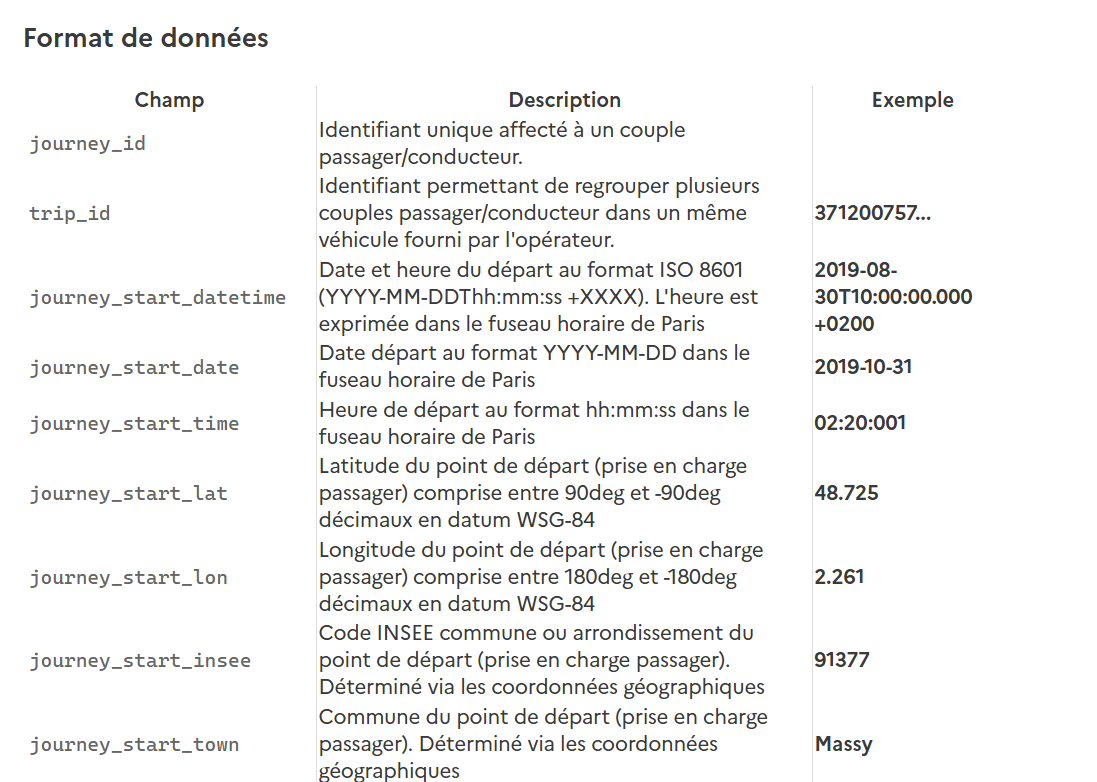

In [339]:
# Read le fichier CSV 

# datas_janvier_2025 = pd.read_csv('../datas/2025-01.csv')   -----> not working 
datas_janvier_2025 = pd.read_csv('../datas/2025-01.csv', sep=';')


# Affichage des données de janvier 2025

print(datas_janvier_2025)


         journey_id                                            trip_id  \
0          50326845  eaf8f2968c7ff0f03689d0853d6e658c70aab69ee9b1cb...   
1          50326844  64660fd4fa2fc70d753b0036c59950f6cf5bce8167dbc8...   
2          50351743  852c41145bd66e6bed4cc9e1f3a9ae708c7963dea272ac...   
3          50324773  9d5420c3d8564c3194ce26ce6b43c2bf85094d5a157636...   
4          50325045  26c8ed60a5e7ecee4a6eebd22cc00000dc1649e374903f...   
...             ...                                                ...   
1187914    51570896  446ea9fa05cb68d262e840ffb4bf5f00ade355cb24095c...   
1187915    51570897  d8a462742ff857d6ef62dd1e6f6090b28ca92cfeb34c99...   
1187916    51570284  c8937916dd6a1c79700bd2a57e05fac21a7cc98d81d79f...   
1187917    51570575  3d52483bd7a6caf8f0e1d16f289eab1792dd866a48269b...   
1187918    51569881  2b2b58324905e4ef54aabeebbfc07cf686ef40870474f2...   

           journey_start_datetime journey_start_date journey_start_time  \
0        2025-01-01T00:00:00+0100   

## Observation 

Le fichier  `2025-01.csv` contient :

- 27 colonnes : Correspond aux 27 types de données décrits sur le site du gouvernement. Cela confirme que le fichier a bien été lu et structuré correctement.
- 1 187 919 lignes : Chaque ligne représente un trajet réalisé en covoiturage pendant le mois de janvier 2025.

Étant donné le volume important de données, il est judicieux de se concentrer uniquement sur les trajets pertinents à notre étude, à savoir ceux dont le point de départ ou d’arrivée est la ville de Rouen.


## Visualisation des villes de départ et d'arrivée

Avant de filtrer les trajets liés à Rouen, je vais afficher toutes les valeurs uniques présentes dans les colonnes `journey_start_town` et `journey_end_town` .

Ces colonnes correspondent  aux villes de départ et  d'arrivée des trajets (cf. documentation officielle du gouvernement —> voir les captures d'écran ci-dessous).

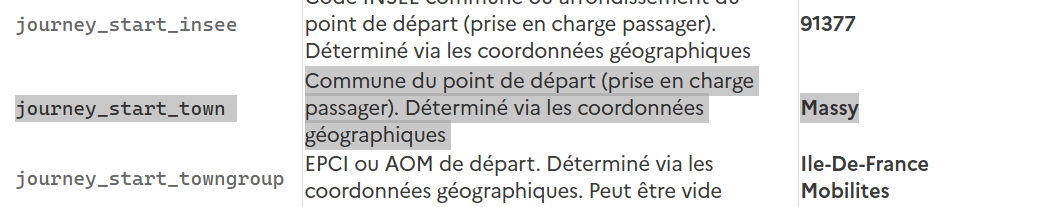


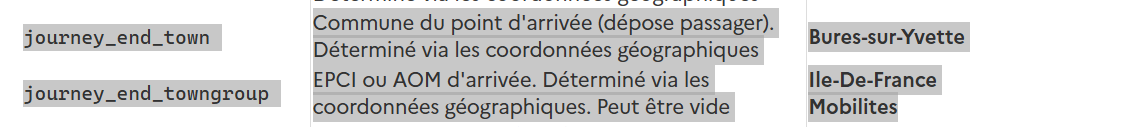

Ceci va me  permettre de vérifier la présence de la ville de Rouen dans les données avant de commencer à filtrer.


In [340]:
# Afficher  les villes de départ
ville_départ_janvier_2025 = datas_janvier_2025['journey_start_town'].unique()
print("Liste des villes de départ Janvier 2025  :")
print(ville_départ_janvier_2025)

# Verif si Rouen est dans la liste des villes de départ
if "Rouen" in ville_départ_janvier_2025:
    print("-------> Rouen est dans la liste des villes de départ")

else: 
    print("-------> Rouen n'est pas dans la liste des villes de départ")

print("\n")
print ("**************************************************************************************")

# Afficher  les villes de départ
ville_arrivé_janvier_2025 = datas_janvier_2025['journey_end_town'].unique()
print("Liste des villes d'arrivée  Janvier 2025  :")
print(ville_arrivé_janvier_2025)

# Verif si Rouen est dans la liste des villes d'arrivée
if "Rouen" in ville_arrivé_janvier_2025:
    print("-------> Rouen est dans la liste des villes d'arrivée")

else:
    print("-------> Rouen n'est pas dans la liste des villes d'arrivée")


Liste des villes de départ Janvier 2025  :
["Saint-Georges-d'Orques" 'Saint-Georges-sur-Loire' 'Petite-Île' ...
 'Montcy-Notre-Dame' 'Lavardin' 'Grignols']
-------> Rouen est dans la liste des villes de départ


**************************************************************************************
Liste des villes d'arrivée  Janvier 2025  :
['Juvignac' 'Ancenis-Saint-Géréon' 'Le Tampon' ... 'Gerbéviller'
 'Criquetot-sur-Longueville' 'Sannat']
-------> Rouen est dans la liste des villes d'arrivée


### Observation

J'ai bien vérifié la présence de la ville de Rouen dans les colonnes des villes de départ et d'arrivée je peux donc  procéder au filtrage des trajets .


## Filtrage des Trajets de/vers Rouen

In [341]:
# Filtre sur départ Roeun Arrivé Rouen
datas_Rouen_janvier_2025 = datas_janvier_2025[(datas_janvier_2025['journey_start_town'] == 'Rouen') | (datas_janvier_2025['journey_end_town'] == 'Rouen')]

print(datas_Rouen_janvier_2025)

print ("**************************************************************************************")

# Afficher le nombre de trajets impliquant Rouen
print("\n")
print(f"------> Nombre de trajets impliquant Rouen : {datas_Rouen_janvier_2025.shape[0]}")


         journey_id                                            trip_id  \
331        50325823  c96b8c61ecbd134064081c54955d8462d88ffdc0494e87...   
341        50327268  cb031ca77c8847878431c012c3e370dfef69078c3c96e0...   
412        50326871  3acc17d555d1e51f51cf54e49f08524e3c140f6d9de03f...   
645        50326901  cc6890f134cc2fb8feb37fcf4620511093ea4614c58bb2...   
2052       50328805  d8e67a0cb324e995faec240053883d335266a4876e4328...   
...             ...                                                ...   
1186208    51567959  517f19a445785d93d3196adab6e207a06a139f1d092492...   
1186696    51568624  a4669ad760f3d916ee73f502156a9588dd8bcbbdb47ed6...   
1186697    51568629  c186491bbd27581a1fa9bac1f8985b33345593eae6f41f...   
1187430    51569227  0902f8b9204d6e8f23dcf582512ad54d43fba976378b48...   
1187783    51570568  6c812ee645eddd8a14bf80ae41c56ffd1332c37e44d01c...   

           journey_start_datetime journey_start_date journey_start_time  \
331      2025-01-01T00:40:00+0100   

### Observation 

Le nombre de ligne correponds aux nombres de trajets de covoiturage dont le départ/arrivée est la ville Roeun. 

On compte un total de **9240 covoiturages** liés à la ville de Rouen (en départ ou en arrivée).

## Analyse Statistique des Trajets Rouen

Dans cette partie, je vais réaliser des statistiques descriptives sur les trajets impliquant la ville de Rouen.

Les colonnes que je vais utiliser sont :

- `journey_distance` : Cette colonne me permettra de calculer la distance minimale, maximale et moyenne des trajets de covoiturage.

- `journey_duration` : Cette colonne me permettra de calculer la durée minimale, maximale et moyenne des trajets de covoiturage.

- `journey_start_date` : Cette colonne me permettra d'analyser la répartition du nombre de trajets par jour pour determiner les  tendances d'utilisation du covoiturage (Weekend ?  ou en semaines ? ).


In [342]:
# Statistiques sur la distance des trajets from / to Rouen 
print("************ Statistiques des Trajets ************\n")
print("Distance des trajets (m):")
print(datas_Rouen_janvier_2025['journey_distance'].describe())

print("\n")
print ("**************************************************************************************")
# Statistiques sur la durée des trajets from / to Rouen 
print("Durée des trajets (min) :")
print(datas_Rouen_janvier_2025['journey_duration'].describe())

print("\n")
print ("**************************************************************************************")

# Nombre de trajets par jour
trajets_par_jour = datas_Rouen_janvier_2025.groupby('journey_start_date').size()
print("Nombre de trajets par jour :")
print(trajets_par_jour)


************ Statistiques des Trajets ************

Distance des trajets (m):
count      9240.000000
mean      26385.923593
std       17669.983864
min        2224.000000
25%       13783.000000
50%       24837.000000
75%       32943.250000
max      476884.000000
Name: journey_distance, dtype: float64


**************************************************************************************
Durée des trajets (min) :
count    9240.000000
mean       26.941883
std        13.970536
min         4.000000
25%        18.000000
50%        26.000000
75%        32.000000
max       547.000000
Name: journey_duration, dtype: float64


**************************************************************************************
Nombre de trajets par jour :
journey_start_date
2025-01-01     73
2025-01-02    123
2025-01-03     30
2025-01-04     27
2025-01-05     21
2025-01-06    154
2025-01-07    471
2025-01-08    382
2025-01-09    456
2025-01-10    408
2025-01-11    127
2025-01-12     60
2025-01-13    502
2025-0

### Observation :  Les Statistiques des Trajets Rouen

Ce qu'on peut retenir des statiques calculés auparavant des trajets de covoiturage durant Janvier impliquant la ville de Rouen :

- Distance moyenne des trajets  : **26385 mètres** ( = 26,4 km)
- Distance minimale des trajets : **2224 mètres** ( = 2,2 km)
- Distance maximale des trajets : **476884 mètres** ( = 476 km)

- Durée moyenne des trajets  : **26,94 minutes**
- Durée minimale des trajets  : **4 minutes**
- Durée maximale des trajets : **547 minutes** (= 9 heures)

Donc je déduis que les trajets implicant Rouen sont  de courte à moyenne distance, avec une durée moyenne raisonnable autour de 27 minutes.

Concernant les tendances d'utilisation de covoiturage , les données ne sont pas très parlantes sous forme de tableau. Une représentation graphique va me permettre d’analyser plus facilement les tendances et les comportements des usagers.


## Visualisation des Données 

Dans cette partie, je vais essayer de confirmer les observations que j'ai déduites précédemment à partir des statistiques, en les représentant visuellement.

Je vais aussi  explorer les tendances d'utilisation de covoiturage , chose que je n'ai pas pu faire avec l'analyse statistique car les données n'étaient pas parlante.

Enfin, je vais afficher une carte des chaleurs des trajets afin de visualiser les zones géographiques les plus concernées par le covoiturage from/to  Rouen.


#### Visualisation des Distances des Trajets
Je vais commencer tout d'abord par tracer un histogramme des distances des trajets afin de confirmer les observations que j'ai pu faire précédemment à partir de l'analyse statistique.


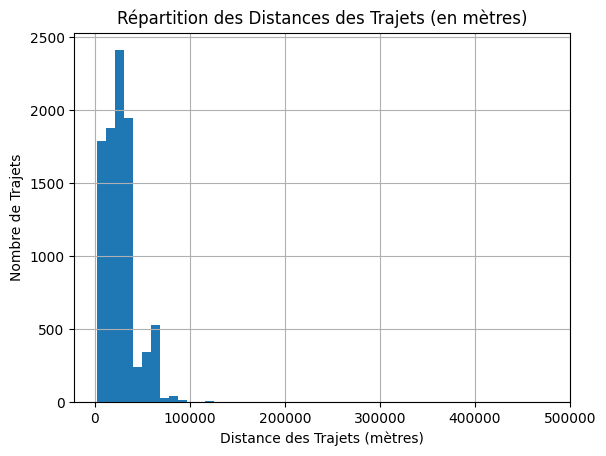

In [343]:
# Plot de l'histogramme de la distance des trajets 
plt.hist(datas_Rouen_janvier_2025['journey_distance'], bins=50) # 50 bins pour l'histogramme pour pas le charger

# Titre et labels
plt.title("Répartition des Distances des Trajets (en mètres)")
plt.xlabel("Distance des Trajets (mètres)")
plt.ylabel("Nombre de Trajets")

# Grille et affichage
plt.grid()
plt.show()


##### Observation

Je remarque que l'échelle de l'axe des distances est très étendue à cause de la présence de quelques trajets de covoiturage avec des distances très élevées ( distance max = 476 Km).

Ces grandes valeurs  représentent un nombre très faible de trajets et donc pas représentatives du comportement général des usagers.

Je vais donc me concentrer uniquement sur les distances les plus fréquentes, à savoir les trajets compris entre 0 et 100 000 mètres pour obtenir une visualisation plus parlante.


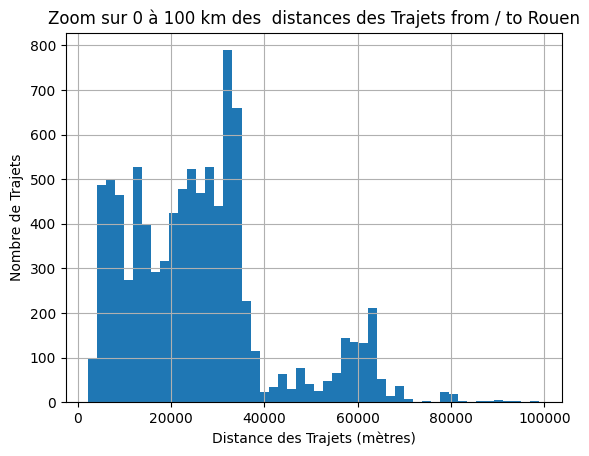

In [344]:
# Filtrage des distances entre 0 et 100000 mètres
plt.hist(datas_Rouen_janvier_2025[datas_Rouen_janvier_2025['journey_distance'] < 100000]['journey_distance'], bins=50)

# Titre et labels
plt.title("Zoom sur 0 à 100 km des  distances des Trajets from / to Rouen")
plt.xlabel("Distance des Trajets (mètres)")
plt.ylabel("Nombre de Trajets")

# Grille et affichage
plt.grid()
plt.show()


##### Observation sur les distances des trajets (Zoom 0 à 100 km)

Grâce à ce zoom,  j'observe que la grande majorité des trajets de covoiturage from / to Rouen sont concentrés entre 0 et 50 000 mètres.

Je remarque également des gros pics  entre 20 000 et 40 000 mètres. Cela pourrait s'expliquer par des déplacements réguliers entre Rouen et les communes voisines  par exemple des étudiants qui rentrent chez leurs parents le week-end ou des trajets domicile-travail depuis la périphérie.

Le nombre de trajets diminue fortement au delà des 60 000 mètres , ce qui confirme que les trajets longue distance restent minoritaires.


#### Visualisation des Durées des Trajets

Je vais maintenant tracer un histogramme des durées des trajets afin de confirmer les observations que j'ai pu faire précédemment à partir de l'analyse statistique et mieux comprendre la répartition des temps de trajet des usagers du covoiturage impliquant Rouen.


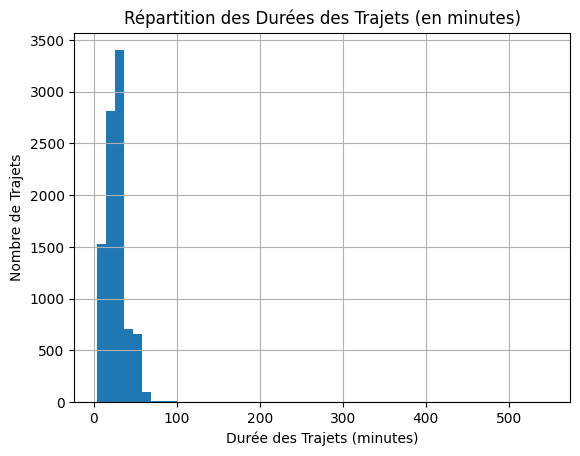

In [345]:
# Plot de l'histogramme de la durée des trajets 
plt.hist(datas_Rouen_janvier_2025['journey_duration'], bins=50) 

# Titre et labels
plt.title("Répartition des Durées des Trajets (en minutes)")
plt.xlabel("Durée des Trajets (minutes)")
plt.ylabel("Nombre de Trajets")

# Grille et affichage
plt.grid()
plt.show()


##### Observation

Je remarque que l'échelle de l'axe des durées des trajets est très étendue à cause de la présence de quelques trajets de covoiturage avec des durées très élevées ( durée max = 547 minutes).

Ces grandes valeurs  représentent un nombre très faible de trajets et donc pas représentatives du comportement général des usagers.

Je vais donc me concentrer uniquement sur les trajets les plus fréquents, à savoir les trajets avec une durée comprise entre 0 et 100 minutes pour obtenir une visualisation plus parlante.


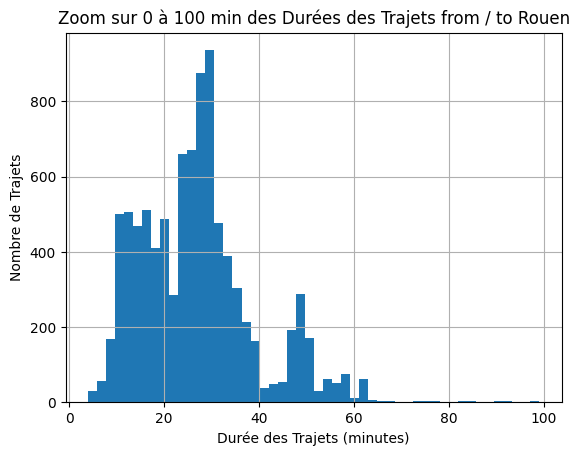

In [346]:
# Filtrage des durées entre 0 et 100 minutes 
plt.hist(datas_Rouen_janvier_2025[datas_Rouen_janvier_2025['journey_duration'] < 100]['journey_duration'], bins=50)

# Titre et labels
plt.title("Zoom sur 0 à 100 min des Durées des Trajets from / to Rouen")
plt.xlabel("Durée des Trajets (minutes)")
plt.ylabel("Nombre de Trajets")

# Grille et affichage
plt.grid()
plt.show()


##### Observation sur les durée des trajets  (Zoom 0 à 100 minutes)

Grâce à ce zoom, j'observe que la grande majorité des trajets de covoiturage from / to Rouen ont une durée comprise entre 0 et 60 minutes.

Je remarque également un pic dominant entre 20 et 40 minutes, ce qui pourrait correspondre à des trajets domicile-travail ou à des déplacements réguliers depuis les communes voisines.

Au-delà de 60 minutes, le nombre de trajets diminue fortement, ce qui confirme que les longs trajets restent minoritaires.

#### Visualisation du Nombre de Trajets par Jour

Je vais maintenant tracer le nombre de trajets de covoiturage par jour afin d'observer les tendances temporelles et confirmer si le covoiturage autour de Rouen est principalement utilisé en semaine ou le week-end .


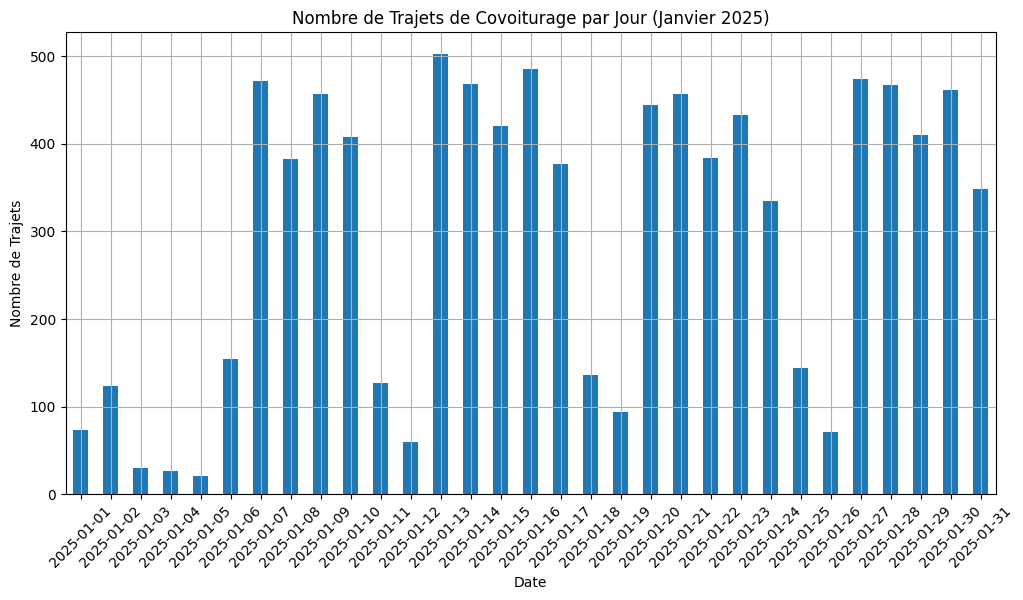

In [347]:
# Visualisation du nombre de trajets par jour
# Taille de la figure pour good affichage
plt.figure(figsize=(12, 6))

# Groupement des datas par dates de départ
groupement_date_datas_Rouen_janvier_2025 = datas_Rouen_janvier_2025.groupby('journey_start_date')

#print(groupement_date_datas_Rouen_janvier_2025)

# Comptage des trajets par jour + plot en barre 
groupement_date_datas_Rouen_janvier_2025.size().plot(kind='bar')

# Titre et labels
plt.title("Nombre de Trajets de Covoiturage par Jour (Janvier 2025)")
plt.xlabel("Date")
plt.ylabel("Nombre de Trajets")

# Grille et affichage
plt.xticks(rotation=45)
plt.grid()
plt.show()


##### Observation sur le Nombre de Trajets par Jour 
Je remarque que la majorité des trajets de covoiturage sont réalisés principalement au cours de la semaine, entre le lundi et le mercredi ( cf calendrier ci dessous).

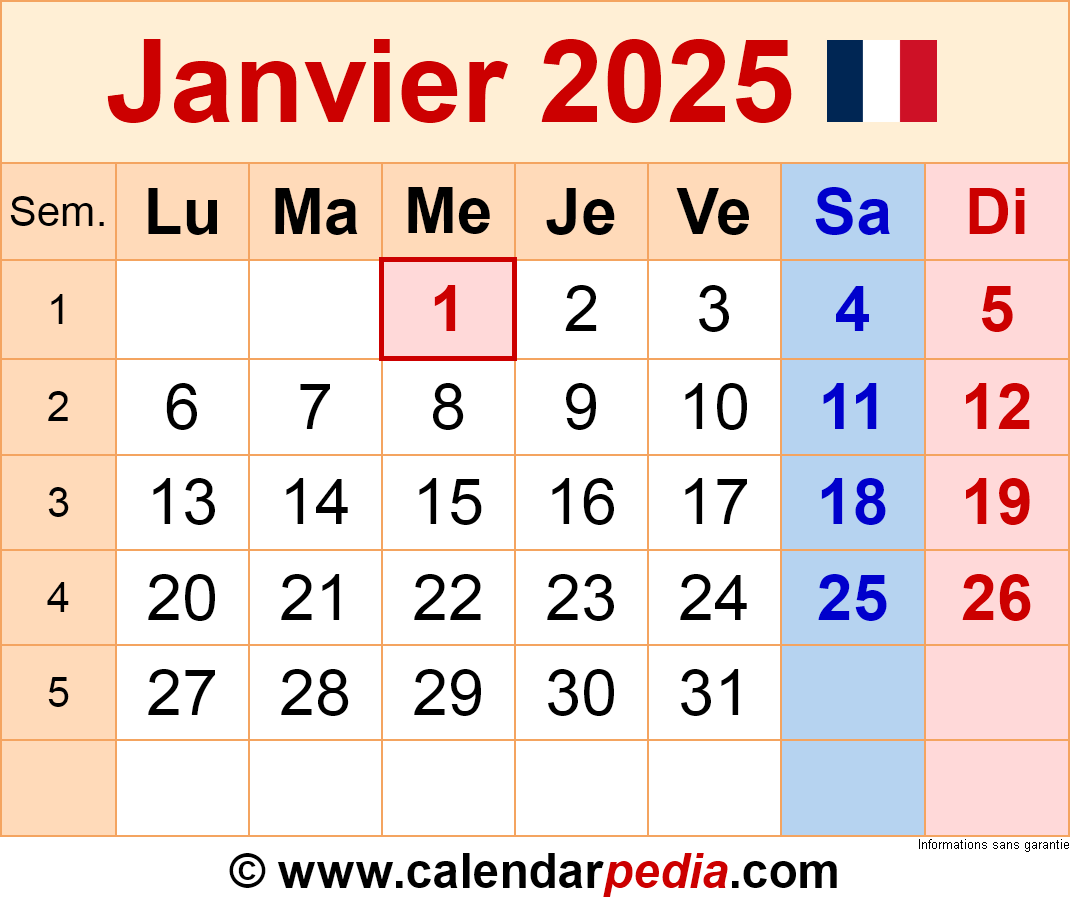

Cela semble correspondre à des trajets domicile-travail depuis les communes voisines vers Rouen ou de Rouen vers des communes voisines réalisés par des usagers réguliers.

Je remarque aussi une baisse  des trajets les jeudis et vendredis, ce qui pourrait s'expliquer par la mise en place du télétravail en fin de semaine.

Enfin, le dimanche présente aussi un nombre élevé de trajets, ce qui pourrait correspondre à des trajets de retour des étudiants après un weekend chez leurs parents ou à des déplacements de loisirs.



#### Visualisation du Nombre de Trajets par Ville

Afin d'observer les zones géographiques les plus concernées par le covoiturage from / to Rouen, je vais analyser les villes de départ et d'arrivée des trajets impliquant Rouen.

L'objectif est d'identifier les villes d'où partent le plus de trajets vers Rouen et celles qui accueillent le plus de trajets en provenance de Rouen.


Top 10 des Villes de Départ vers Rouen :

journey_start_town
Val-de-Reuil                407
Louviers                    276
Saint-Étienne-du-Rouvray    228
Évreux                      160
Le Trait                    144
Grand-Couronne              138
Mont-Saint-Aignan           104
Pacy-sur-Eure               103
Saint-Aubin-lès-Elbeuf       91
Cléon                        83
Name: count, dtype: int64


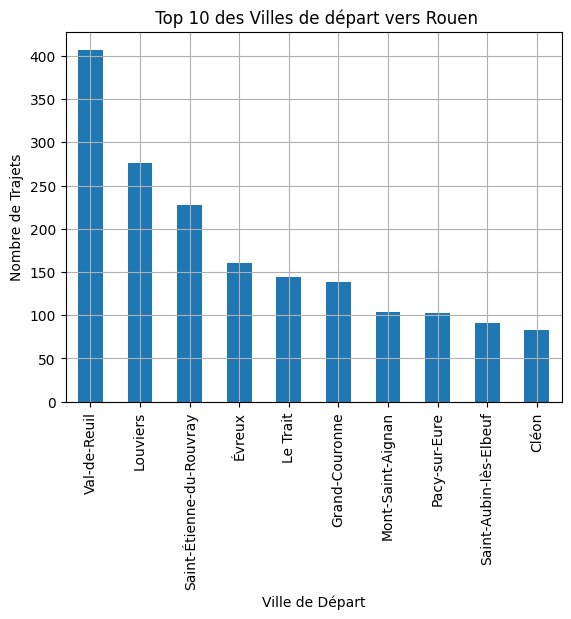

**************************************************************************************
Top 10 des Villes d'arrivée depuis Rouen :

journey_end_town
Val-de-Reuil                462
Louviers                    253
Saint-Étienne-du-Rouvray    252
Le Trait                    172
Évreux                      169
Mont-Saint-Aignan           143
Pacy-sur-Eure               113
Saint-Aubin-lès-Elbeuf      112
Cléon                       111
Grand-Couronne              107
Name: count, dtype: int64


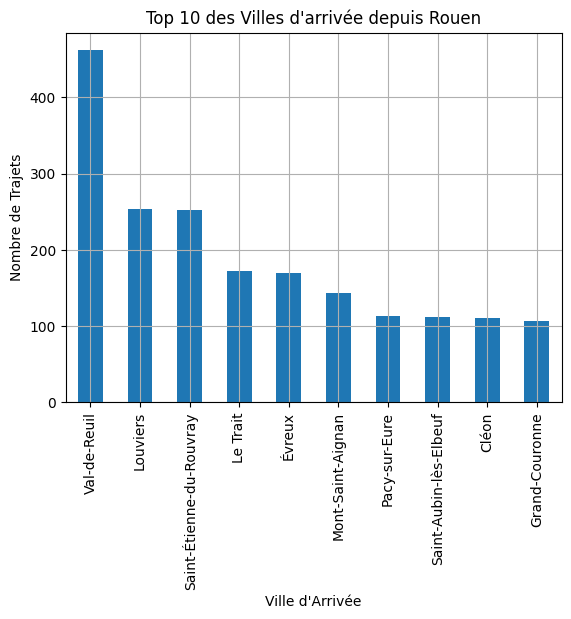

In [348]:
# Filtrage des villes de départ (sans Rouen)
villes_depart_sans_rouen = datas_Rouen_janvier_2025[datas_Rouen_janvier_2025['journey_start_town'] != 'Rouen']

# print(villes_depart_sans_rouen)

# Comptage des villes de départ les plus fréquentes Top 10 
nbr_ville_départ = villes_depart_sans_rouen['journey_start_town'].value_counts().head(10)

# Affichage des top 10 des villes de départ
print("Top 10 des Villes de Départ vers Rouen :\n")

print(nbr_ville_départ)

# Plot des villes de départ
nbr_ville_départ.plot(kind='bar')

# Titre et labels
plt.title(" Top 10 des Villes de départ vers Rouen")
plt.xlabel("Ville de Départ")
plt.ylabel("Nombre de Trajets")

# Grille et affichage
plt.grid()
plt.show()

print ("**************************************************************************************")

# Filtrage des villes d'arrivée (exclure Rouen)
villes_arrivee_sans_rouen = datas_Rouen_janvier_2025[datas_Rouen_janvier_2025['journey_end_town'] != 'Rouen']
# print(villes_arrivee_sans_rouen)

# Compter les villes d'arrivée les plus fréquentes
nbr_ville_arrivée = villes_arrivee_sans_rouen['journey_end_town'].value_counts().head(10)

# Affichage des top 10 des villes d'arrivée
print("Top 10 des Villes d'arrivée depuis Rouen :\n")
print(nbr_ville_arrivée)

# Plot des villes d'arrivée
nbr_ville_arrivée.plot(kind='bar')

# Titre et labels
plt.title("Top 10 des Villes d'arrivée depuis Rouen")
plt.xlabel("Ville d'Arrivée")
plt.ylabel("Nombre de Trajets")

# Grille et affichage
plt.grid()
plt.show()


#### Observation sur les Villes de Départ et d'Arrivée from / to Rouen 

L'analyse des villes les plus concernées par les trajets de covoiturage from / to Rouen  montre que :

- Les villes de départ les plus récurrentes sont : **Val-de-Reuil**, **Louviers** et **Saint-Étienne-du-Rouvray**.
- Ces villes sont situées à proximité de Rouen, dans un rayon de 20 à 50 km comme le montre la carte ci_dessous, ce qui renforce mon idée d'utilisation du covoiturage pour des trajets domicile-travail ou des déplacements réguliers entre les communes périphériques et Rouen.

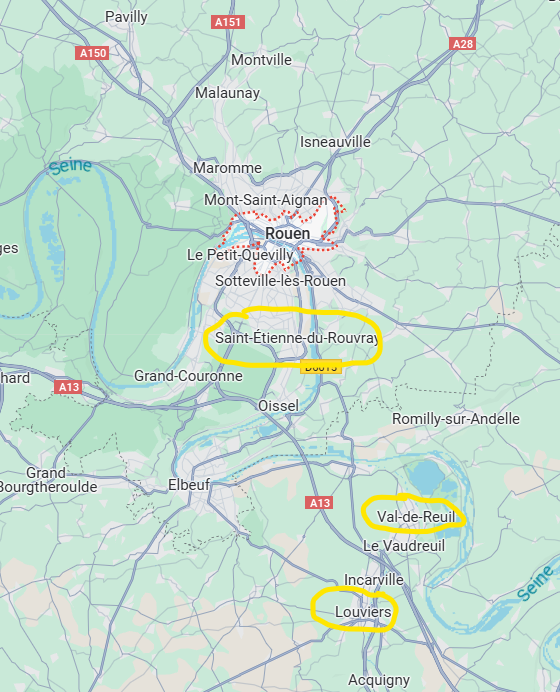

J'observe également que les villes d'arrivée les plus fréquentes sont les mêmes  villes de départ ce qui mon hypothèse de trajet ( Travail  - domicile / Ecole - Foyer).

> Remarque : Il aurait été pertinent d'analyser également les horaires de départ et d'arrivée des trajets pour vérifier si ces déplacements sont bien réalisés principalement aux heures de pointe (matin et soir) , mais  cette analyse  aurait alourdi l'exercie. 


#### Visualisation des Zones Géographiques les plus Fréquentées (Départ / Arrivée)

Après avoir identifié les villes de départ et d'arrivée des trajets de covoiturage from / to Rouen les plus fréquentes, je vais maintenant réaliser des cartes de chaleur afin de représenter ces informations de manière géographique.

Ces deux cartes vont permettre de visualiser rapidement les zones les plus sollicitées autour de Rouen pour les trajets de covoiturage.

##### Localisation de la Ville de Rouen

Pour ce faire il est essentiel de connaître les coordonnées GPS de la ville de Rouen.

Les coordonnées GPS de Rouen sont (cf image ci-dessous) :  
- **Latitude** : 49.433331°  
- **Longitude** : 1.08333°  

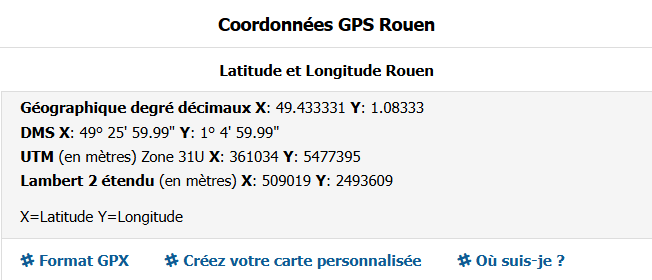

##### Coordonnées GPS des Trajets dans les datas

Dans les datas fournies, les coordonnées géographiques des points de départ et d'arrivée des trajets sont déjà disponibles dans les colonnes suivantes (cf image ci-dessous) :  

- `journey_start_lat` : Latitude du point de départ  
- `journey_start_lon` : Longitude du point de départ  
- `journey_end_lat` : Latitude du point d'arrivée  
- `journey_end_lon` : Longitude du point d'arrivée  


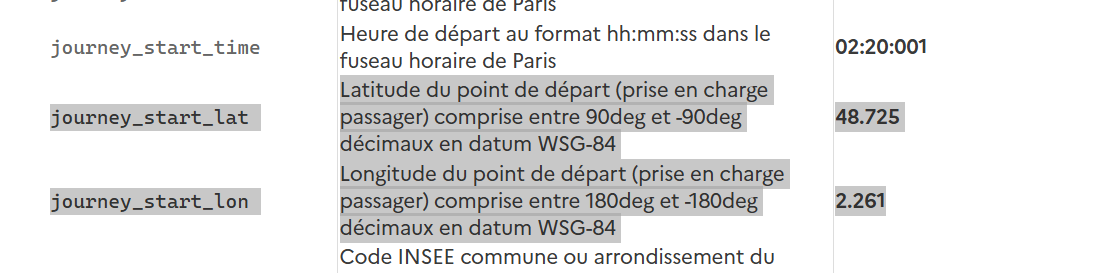

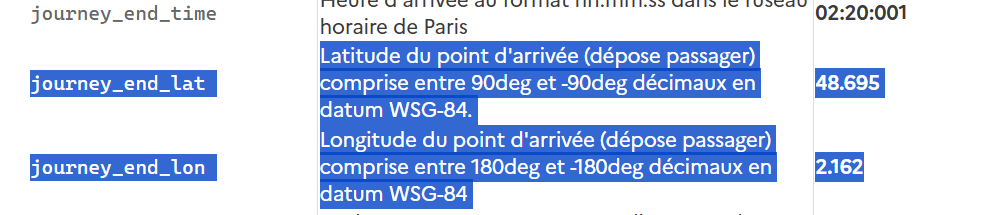

Nous allons donc utiliser ces colonnes pour construire :  
- Une carte de chaleur des points de départ des trajets  
- Une carte de chaleur des points d'arrivée des trajets  



In [349]:
# Création de la carte centré sur Rouen
map_depart = folium.Map(location=[49.433331, 1.08333], zoom_start=10) # 49.433331, 1.08333 sont les coordonnées de Rouen)

# Création de la liste des points de départ (latitude, longitude)
points_depart = villes_depart_sans_rouen[['journey_start_lat', 'journey_start_lon']].dropna().values.tolist()

# Génération de la Heatmap
HeatMap(points_depart).add_to(map_depart)

# Affichage de la carte des points de départ
print("*********************** Carte de chaleur des lieux de départ des trajets vers Rouen ***********************")
map_depart


*********************** Carte de chaleur des lieux de départ des trajets vers Rouen ***********************


#### Observation sur la Carte de Chaleur des Lieux de Départ

L’analyse  des lieux de départ des trajets de covoiturage vers Rouen révèle une forte concentration autour des communes voisines.
Cela traduit une utilisation majoritaire du covoiturage pour des déplacements de proximité, probablement domicile-travail.

Les zones les plus éloignées apparaissent très faiblement, ce qui confirme que les trajets longue distance restent très marginaux.


In [350]:
# Création de la carte centrée sur Rouen
map_arrivee = folium.Map(location=[49.433331, 1.08333], zoom_start=10)  # Coordonnées de Rouen

# Création de la liste des points d'arrivée (latitude, longitude)
points_arrivee = villes_arrivee_sans_rouen[['journey_end_lat', 'journey_end_lon']].dropna().values.tolist()

# Génération de la Heatmap
HeatMap(points_arrivee).add_to(map_arrivee)

# Affichage de la carte des points d'arrivée
print("*********************** Carte de chaleur des lieux d'arrivée des trajets depuis Rouen ***********************")
map_arrivee


*********************** Carte de chaleur des lieux d'arrivée des trajets depuis Rouen ***********************


#### Observation sur la Carte de Chaleur des Lieux d'arrivée 

La carte de chaleur des lieux d’arrivée met en évidence une dynamique similaire : les trajets depuis Rouen se dirigent principalement vers des villes situées dans un rayon restreint autour de la métropole.

Cela reflète le caractère local et quotidien des trajets analysés, et renforce mon hypothèse d’usage du covoiturage principalement pour des trajets pendulaires (domicile - travail ou école).


## Conclusion générale 

Pour conclure, cette analyse des trajets de covoiturage from / to Rouen met en évidence des comportements de mobilité bien définis.

Les visualisations que j'ai fait ( distances , durées, répartition temporelle , répartition géographique) montre que le covoiturage est principalement utilisé pour des trajets courts et moyens , réalisés en semaine et concentrés autour des communes voisines de Rouen. 

Ces résultats confirment l’hypothèse d’un usage régulier du covoiturage comme par exemple domicile-travail ou domicile-études.

Enfin, les trajets longue distance restent minoritaires et les analyses géographiques confirment ceci . 

> J’aurais également pu approfondir cette étude en analysant, par exemple, les heures de départ et d’arrivée des trajets. Cependant, ces explorations supplémentaires auraient alourdi le rendu final et dépassé le cadre initial de cette analyse.
